# Data Science Workshop
# NBA Free Throws Prediction

![title](img/free_throw_img.jpg)

## Data preparation and cleaning

## Import Python Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

## Reading the Original Dataset


In [2]:
free_throws_db = pd.read_csv('free_throws.csv')
free_throws_db.drop_duplicates()
free_throws_db.head(10)

,end_result,game,game_id,period,play,player,playoffs,score,season,shot_made,time
0,106 - 114,PHX - LAL,261031013,1,Andrew Bynum makes free throw 1 of 2,Andrew Bynum,regular,0 - 1,2006 - 2007,1,11:45
1,106 - 114,PHX - LAL,261031013,1,Andrew Bynum makes free throw 2 of 2,Andrew Bynum,regular,0 - 2,2006 - 2007,1,11:45
2,106 - 114,PHX - LAL,261031013,1,Andrew Bynum makes free throw 1 of 2,Andrew Bynum,regular,18-Dec,2006 - 2007,1,7:26
3,106 - 114,PHX - LAL,261031013,1,Andrew Bynum misses free throw 2 of 2,Andrew Bynum,regular,18-Dec,2006 - 2007,0,7:26
4,106 - 114,PHX - LAL,261031013,1,Shawn Marion makes free throw 1 of 1,Shawn Marion,regular,21-Dec,2006 - 2007,1,7:18
5,106 - 114,PHX - LAL,261031013,1,Amare Stoudemire makes free throw 1 of 2,Amare Stoudemire,regular,33 - 20,2006 - 2007,1,3:15
6,106 - 114,PHX - LAL,261031013,1,Amare Stoudemire makes free throw 2 of 2,Amare Stoudemire,regular,34 - 20,2006 - 2007,1,3:15
7,106 - 114,PHX - LAL,261031013,2,Leandro Barbosa misses free throw 1 of 2,Leandro Barbosa,regular,43 - 29,2006 - 2007,0,10:52
8,106 - 114,PHX - LAL,261031013,2,Leandro Barbosa makes free throw 2 of 2,Leandro Barbosa,regular,44 - 29,2006 - 2007,1,10:52
9,106 - 114,PHX - LAL,261031013,2,Lamar Odom makes free throw 1 of 2,Lamar Odom,regular,44 - 30,2006 - 2007,1,10:37


Describition of dataset:
- end_result: host total score - guest total score
- game: host team vs guest team
- game_id: id of specific game
- period: which quarter
- play: who make free throw, make or miss free throw
- player: player name
- playoffs: whether a playoff game or regular game
- score: host team score - guest team score at that time
- season: NBA season
- shot_made: whether player got the free throw
- time: time left in that quarter

In [3]:
print("Number of free throws in database: %d"%(free_throws_db.shape[0]))
print("Number of games in database: {}".format(free_throws_db.game_id.unique().size))
print("Games distribution:")
free_throws_db['playoffs'].value_counts()

Number of free throws in database: 618019
Number of games in database: 12874
Games distribution:


regular     575893
playoffs     42126
Name: playoffs, dtype: int64

## Collecting more data from internet

In order to expand our dataset, we decided to use an open source python library PandasBasketball, and use a webscrapper in order to get more players stats from https://www.basketball-reference.com website

In [4]:
from tools import get_player_stats
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='BeatifulSoup')
dataFrame = get_player_stats("Lebron James")
print(dataFrame.columns)
dataFrame.head(20)

Index(['Season', 'Age', 'Tm', 'Lg', 'Pos', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Height',
       'Weight', 'ShootingHand', 'draftRank'],
      dtype='object')


,Season,Age,Tm,Lg,Pos,G,GS,MP,FG,FGA,...,AST,STL,BLK,TOV,PF,PTS,Height,Weight,ShootingHand,draftRank
0,2003-04,19,CLE,NBA,SG,79,79,3122,622,1492,...,465,130,58,273,149,1654,206,113,Right,1
1,2004-05,20,CLE,NBA,SF,80,80,3388,795,1684,...,577,177,52,262,146,2175,206,113,Right,1
2,2005-06,21,CLE,NBA,SF,79,79,3361,875,1823,...,521,123,66,260,181,2478,206,113,Right,1
3,2006-07,22,CLE,NBA,SF,78,78,3190,772,1621,...,470,125,55,250,171,2132,206,113,Right,1
4,2007-08,23,CLE,NBA,SF,75,74,3027,794,1642,...,539,138,81,255,165,2250,206,113,Right,1
5,2008-09,24,CLE,NBA,SF,81,81,3054,789,1613,...,587,137,93,241,139,2304,206,113,Right,1
6,2009-10,25,CLE,NBA,SF,76,76,2966,768,1528,...,651,125,77,261,119,2258,206,113,Right,1
7,2010-11,26,MIA,NBA,SF,79,79,3063,758,1485,...,554,124,50,284,163,2111,206,113,Right,1
8,2011-12,27,MIA,NBA,SF,62,62,2326,621,1169,...,387,115,50,213,96,1683,206,113,Right,1
9,2012-13,28,MIA,NBA,PF,76,76,2877,765,1354,...,551,129,67,226,110,2036,206,113,Right,1


In [5]:
# added this box because the externat data code didn't work on my computer
# delete this box before submiting! 

# free_throws_db = pd.read_csv('C:/Users/Shachar/DS_Workshop/SUMMARY.csv')
# free_throws_db.drop_duplicates()

database_path = "/Users/gorbrin/PycharmProjects/untitled/SUMMARY.csv"
#free_throws_db = pd.read_csv(database_path)
free_throws_db.drop_duplicates()


,end_result,game,game_id,period,play,player,playoffs,score,season,shot_made,time
0,106 - 114,PHX - LAL,261031013,1,Andrew Bynum makes free throw 1 of 2,Andrew Bynum,regular,0 - 1,2006 - 2007,1,11:45
1,106 - 114,PHX - LAL,261031013,1,Andrew Bynum makes free throw 2 of 2,Andrew Bynum,regular,0 - 2,2006 - 2007,1,11:45
2,106 - 114,PHX - LAL,261031013,1,Andrew Bynum makes free throw 1 of 2,Andrew Bynum,regular,18-Dec,2006 - 2007,1,7:26
3,106 - 114,PHX - LAL,261031013,1,Andrew Bynum misses free throw 2 of 2,Andrew Bynum,regular,18-Dec,2006 - 2007,0,7:26
4,106 - 114,PHX - LAL,261031013,1,Shawn Marion makes free throw 1 of 1,Shawn Marion,regular,21-Dec,2006 - 2007,1,7:18
...,...,...,...,...,...,...,...,...,...,...,...
618014,104 - 118,DAL - OKC,400874368,4,Randy Foye makes free throw 1 of 2,Randy Foye,playoffs,103 - 116,2015 - 2016,1,0:53
618015,104 - 118,DAL - OKC,400874368,4,Randy Foye makes free throw 2 of 2,Randy Foye,playoffs,103 - 117,2015 - 2016,1,0:53
618016,104 - 118,DAL - OKC,400874368,4,Kevin Durant makes technical free throw,Kevin Durant,playoffs,103 - 118,2015 - 2016,1,0:27
618017,104 - 118,DAL - OKC,400874368,4,Dwight Powell misses free throw 1 of 2,Dwight Powell,playoffs,103 - 118,2015 - 2016,0,0:26


Columns used for this database for each player:
- Position : The most common position for the player over his seasons.
- FG%
- 3P%
- FT%
- Height
- Weight
- ShootingHand
- draftRank

## Specifing Data Types

In [6]:
binary_variables = ['shot_made', 'playoffs', 'ShootingHand']
categorical_variables = ['end_result', 'game', 'game_id', 'period', 'play', 'player', 'season', 'Pos']
numeric_variables = ['score','time','FG%','2P%', '3P%', 'FT%', 'Height', 'Weight', 'draftRank']

In [7]:

database_path = "/Users/gorbrin/PycharmProjects/untitled/SUMMARY.csv"
free_throws_db = pd.read_csv(database_path)
free_throws_db.drop_duplicates()
free_throws_db.count()


Unnamed: 0      618019
end_result      618019
game            618019
game_id         618019
period          618019
play            618019
player          618019
playoffs        618019
score           618019
season          618019
shot_made       618019
time            618019
FG%             618019
2P%             618019
3P%             612941
FT%             618019
Height          618019
Weight          618019
draftRank       579587
Pos             618019
ShootingHand    618019
dtype: int64

as we can see, we have only one column with missing data - the draftRank column. 
this values are missing because the players performed the throw didn't have a draft rank and not because we couldn't collect the data. 

### Analyzing the number of throws troughout the game

we would like to show the free throws distribution throughout the game time,
in our current dataset, the time column represents the time left in that quarter and the period column represents the quarter of the game, so we'll add a new column to our data which calculate the absolute time in the game that the throw was made

In [8]:
free_throws_db['minute'] = free_throws_db.time.apply(lambda x: int(x[:len(x)-3]))
free_throws_db['sec'] = free_throws_db.time.apply(lambda x: int(x[len(x)-2:]))
free_throws_db['abs_min'] = 12 - free_throws_db['minute']+12*(free_throws_db.period -1)
free_throws_db['abs_time'] = 60*(free_throws_db.abs_min-1) + 60 - free_throws_db['sec']

#  counting the num of throws, and success throws precentage per minute
minutes = range(int(max(free_throws_db.abs_min)))
total_throws = []
success_throws = []
success_precentage = []

def count_throws(free_throws_db,minute):    
    made = len(free_throws_db[(free_throws_db.abs_min == minute) & (free_throws_db.shot_made == 1)])
    success_throws.append(made)
    total = len(free_throws_db[free_throws_db.abs_min == minute])
    total_throws.append(total)
    if total == 0:
        precentage = 0.0
    else:
        precentage = made/total
    success_precentage.append(precentage)

for minute in minutes:
    count_throws(free_throws_db,minute)

Text(0, 0.5, 'num of throws')

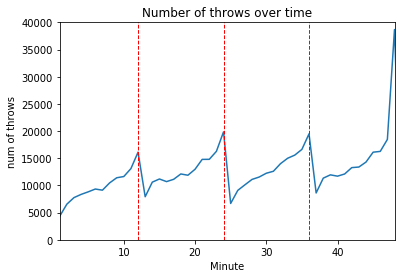

In [9]:
# Number of throws over time
plt.plot(minutes,total_throws)
plt.title('Number of throws over time')
plt.xlim([1,48])
plt.ylim([0, 40000])
plt.plot([12,12],[0,40000], '--', linewidth = 1, color = 'r')
plt.plot([24,24],[0,40000], '--', linewidth = 1, color = 'r')
plt.plot([36,36],[0,40000], '--', linewidth = 1, color = 'r')
plt.plot([48,48],[0,40000], '--', linewidth = 1, color = 'r')
plt.xlabel('Minute')
plt.ylabel('num of throws')

Text(0, 0.5, 'Free Throws %')

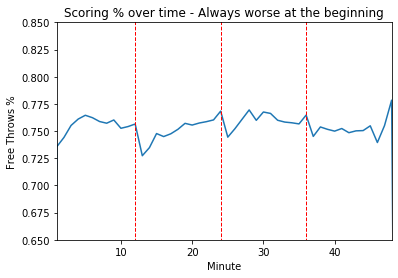

In [10]:
# Success throws precentage over time   
plt.plot(minutes,success_precentage)
plt.title('Scoring % over time - Always worse at the beginning')
plt.xlim([1,48])
plt.ylim([0.65,0.85])
plt.plot([12,12],[0,1], '--', linewidth = 1, color = 'r')
plt.plot([24,24],[0,1], '--', linewidth = 1, color = 'r')
plt.plot([36,36],[0,1], '--', linewidth = 1, color = 'r')
plt.plot([48,48],[0,1], '--', linewidth = 1, color = 'r')
plt.xlabel('Minute')
plt.ylabel('Free Throws %')

from the plots we can observe that at the begining of every querter, both the number of free throws and the success precentage drops. 
moreover, at the end of a quarter, and especially at the end of the game, both plots increase.

We wanted to see the coralation between the draft rank of the players and the result of the shot made

### The corelation between the player's draft rank and the free-throw result

as we saw at the data description, we have some missing values in the draftRank column, and it was because the player throwing had no draft rank. 
As we can see below, the majoraty of the data in this column is avalable so we will ommit throws that were made by a player with no draft rank.

In [11]:
# the precentage of the data that has draftRank:
print(free_throws_db['draftRank'].count()/free_throws_db['game'].count())
print(free_throws_db['draftRank'].value_counts())


0.9378142095954979
1.0    42166
3.0    33002
4.0    30115
5.0    27019
9.0    26418
       ...  
34        48
47        40
43        18
24         2
11         2
Name: draftRank, Length: 105, dtype: int64


In [12]:
free_throws_db['draftRank'] = free_throws_db['draftRank'].replace(np.nan, 0)
free_throws_db['draftRank'] = free_throws_db['draftRank'].replace("undrafted", 0)
# pd.to_numeric(free_throws_db['draftRank'])
free_throws_db['draftRank'] = free_throws_db.draftRank.apply(lambda x: int(float(x)))

np.nanmax(free_throws_db['draftRank'])

ranks = range(int(np.nanmax(free_throws_db['draftRank']))+1)
success_precentage_by_rank = []

def throws_per_rank(free_throws_db,rank):    
    total = len(free_throws_db[free_throws_db.draftRank == rank])
    if total == 0:
        precentage = 0.0
    else:
        made = len(free_throws_db[(free_throws_db.draftRank == rank) & (free_throws_db.shot_made == 1)])
        precentage = made/total
    success_precentage_by_rank.append(precentage)

for rank in ranks:
    throws_per_rank(free_throws_db,rank)

Text(0, 0.5, 'Free Throws %')

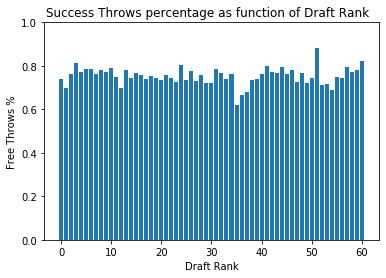

In [13]:
# Success throws precentage over time
plt.bar(list(ranks),success_precentage_by_rank)
plt.title('Success Throws percentage as function of Draft Rank  ')
#plt.xlim([-2,61])
plt.ylim([0,1])
plt.xlabel('Draft Rank')
plt.ylabel('Free Throws %')